In [218]:
import pandas as pd
import seaborn as sns

In [219]:
sns.set_palette('deep')

In [220]:
polydeg = '16384'
#strip = 'adder : '
title = 'xi2'
fname = 'xi2'


path1 = f'{fname}/{fname}_ModSwitch_{polydeg}.csv'   #modswitch
path2 = f'{fname}/{fname}_noModSwitch_{polydeg}.csv' #no modswitch

In [221]:
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)

#print(df1)

dataMod = df1.iloc[:,[0,1]]
dataNoMod = df2.iloc[:,[0,1]]

dataMod['time'] = dataMod['time'] * 1e-3
dataNoMod['time'] = dataNoMod['time'] * 1e-3


concatenated = pd.concat([dataMod.assign(dataset='MODSWITCH'), dataNoMod.assign(dataset='NO MODSWITCH')])
# dfMod = pd.DataFrame({'n' : df1.loc[:, "n"]})
# print(dfMod)

# for d in raw:
#     data.append(pd.DataFrame({'time' : d.iloc[:, 1], 'n': d.columns[0]}))
# data = pd.concat(data, axis=0).reset_index(drop=True)


In [222]:
concatenated

,n,time,dataset
0,1,527.491,MODSWITCH
1,1,494.385,MODSWITCH
2,1,494.557,MODSWITCH
3,1,496.942,MODSWITCH
4,1,493.898,MODSWITCH
...,...,...,...
95,512,22266.423,NO MODSWITCH
96,512,22271.704,NO MODSWITCH
97,512,22596.444,NO MODSWITCH
98,512,22317.085,NO MODSWITCH


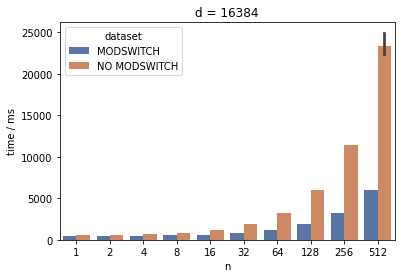

In [223]:
g = sns.barplot(data=concatenated, x='n', y='time', hue="dataset")
#g.set_title(title + polydeg)
g.set_title('d = ' + polydeg)
g.set_xlabel('n')
g.set_ylabel('time / ms')
g.figure.savefig(f'{fname}/{fname}_{polydeg}_bar.jpg', transparent=False, format='jpg', bbox_inches='tight')

In [226]:
#speedup bootstrapping analysis


initialData = {'n': [], 'speedup': []}
speedups = pd.DataFrame(initialData)

print(speedups)

for x in (2**p for p in range(0, 10)):
    for i in range(100):
        subsampleMod    =  dataMod[dataMod.n == x].sample(n=10, replace=True)
        subsampleNoMod  =  dataNoMod[dataNoMod.n == x].sample(n=10, replace=True)
        factor = (subsampleNoMod["time"].mean()) / (subsampleMod["time"].mean())
        new_row = {'n': x, 'speedup': factor}
        speedups = speedups.append(new_row, ignore_index=True)
      
        
speedups = speedups.astype({"n": int})

speedups
#subsampleMod   = dataMod..sample(n=100, replace=True)
#print(subsampleMod)


Empty DataFrame
Columns: [n, speedup]
Index: []


,n,speedup
0,1,1.139362
1,1,1.153837
2,1,1.149611
3,1,1.157763
4,1,1.135377
...,...,...
995,512,3.867708
996,512,3.855746
997,512,3.702289
998,512,3.728389


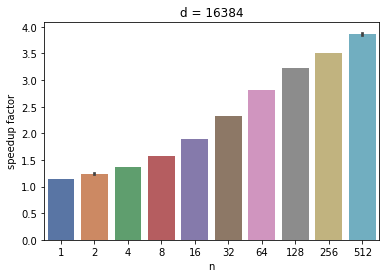

In [229]:
g = sns.barplot(data=speedups, x='n', y='speedup')
#g.set_title(title + polydeg)
g.set_title('d = ' + polydeg)
g.set_xlabel('n')
g.set_ylabel('speedup factor')
g.figure.savefig(f'{fname}/{fname}_speedup_{polydeg}_bar.jpg', transparent=False, format='jpg', bbox_inches='tight')